# Homework 1

Due Thursday 1/22

The main objectives of this assignment are: to test the set up your Python environment, introduce the use of Jupyter style cells, and compare classical machine learning models against a basic neural network on a toy classification problem (iris dataset).

## 1. Setup 
Load the necessary Python packages and load the iris dataset

In [73]:
# Load necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Load the dataset using seaborn for EDA and visualization
iris_df = sns.load_dataset('iris')

# Load the dataset
iris = load_iris(as_frame=True)
# Access the features (DataFrame) and target (Series) for ML tasks
X = iris.data
y = iris.target

## 2. Basic Exploratory Data Analysis

* Understand the structure of the dataset. 
* Calculate basic statistic for each feature
* Explore the correlation between features
* Explore the distribution of samples by their norm

In [75]:
# Display the structure of the DataFrame
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
# Calculate summary statistics of the dataset
print(iris_df.describe())
# Count the number of instances for each species
print(iris_df['species'].value_counts())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


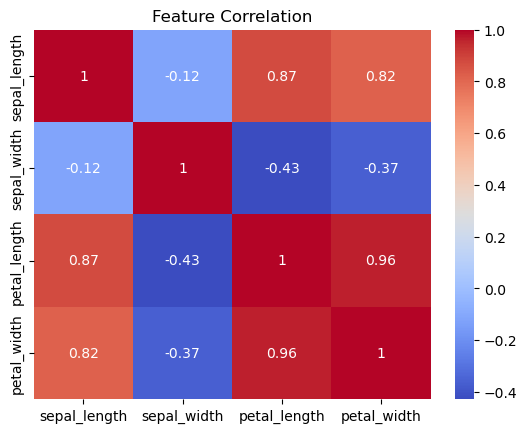

In [77]:
# Show the correlation between features using a correlation Heatmap
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\|'
<>:10: SyntaxWarning: invalid escape sequence '\|'
C:\Users\quinc\AppData\Local\Temp\ipykernel_8928\2658914941.py:10: SyntaxWarning: invalid escape sequence '\|'
  plt.xlabel('L2 Norm ($\|x\|_2$)')


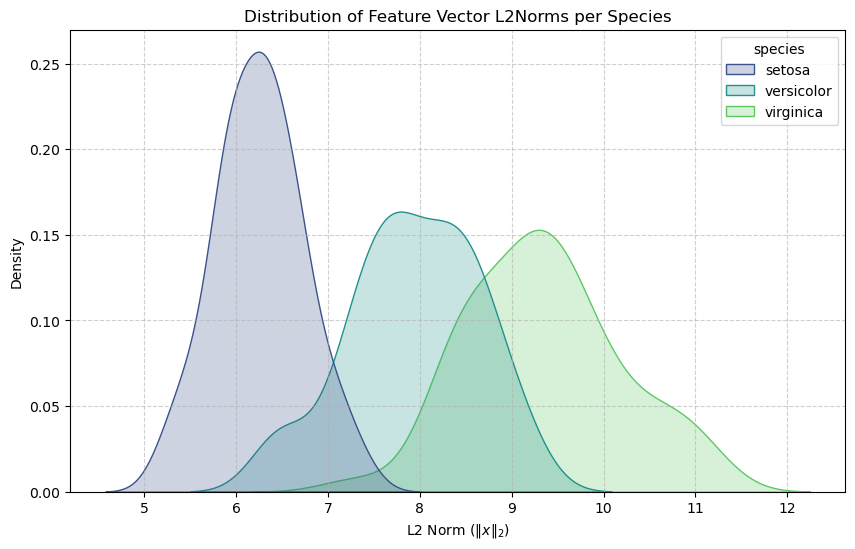

In [78]:
# Plot the distribution of the L2-norm of the feature vectors per species
#
# Calculate the L2 norm for the feature vectors (first 4 columns)
iris_df['feature_norm_l2'] = np.linalg.norm(iris_df.iloc[:, 0:4], axis=1)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=iris_df, x='feature_norm_l2', hue='species', fill=True, palette='viridis')
plt.title('Distribution of Feature Vector L2Norms per Species')
plt.xlabel('L2 Norm ($\|x\|_2$)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)


## 3 Machine Learning Modeling and Evaluation

### Simple Train/Test Split (Holdout Validation Method)
Split the dataset into 2 parts: training (70%) and testing (30%). Make sure to stratefy the split. 

### Training
Train the following models using scikit-learn:

* Perceptron (use `Perceptron()`)
* Decision Tree (use `DecisionTreeClassifier()`)
* K-Nearest Neighbors (use `KNeighborsClassifier(n_neighbors=3)`)
* Support Vector Machine (use `SVC(kernel='linear')`)
* Multi-Layer Perceptron (use `MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)`)

### Evaluation

For each model, you must output:
- A Confusion Matrix (visualized using `ConfusionMatrixDisplay`).
- A Classification Report showing:
    - Accuracy
    - Precision (Macro Average)
    - Recall (Macro Average)
    - F1-Score (Macro Average)

In [88]:
# Machine Learning Code
# 
# Create a test/train split for X and y 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (105, 4), y_train shape: (105,)
X_test shape: (45, 4), y_test shape: (45,)


In [89]:
# Function to evaluate the classifier by printing the confusion matrix
def evaluate_classifier(y_true, y_pred, class_names):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=class_names)

# Function to calculate overall accuracy, precision, recall, F1-score
def classification_metrics(y_true, y_pred, class_names):
    print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.76      0.87      0.81        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



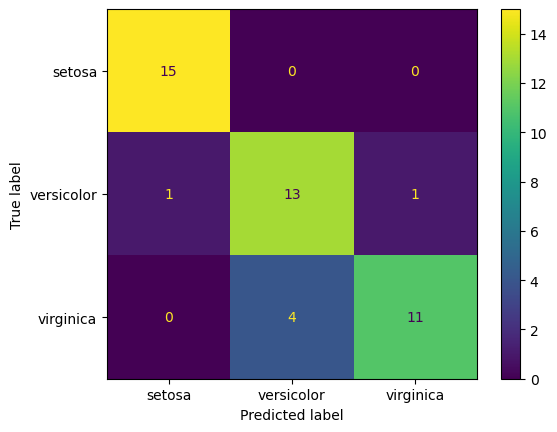

In [90]:
# Train a perceptron classifier
from sklearn.linear_model import Perceptron
percep = Perceptron()
percep.fit(X_train, y_train)

# Print the evaluation metrics
y_pred = percep.predict(X_test)
evaluate_classifier(y_test, y_pred, iris.target_names)
classification_metrics(y_test, y_pred, iris.target_names)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.87      0.87      0.87        15
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



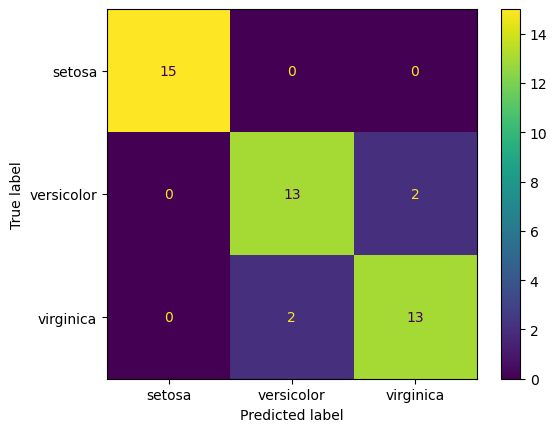

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
evaluate_classifier(y_test, y_pred, iris.target_names)
classification_metrics(y_test, y_pred, iris.target_names)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



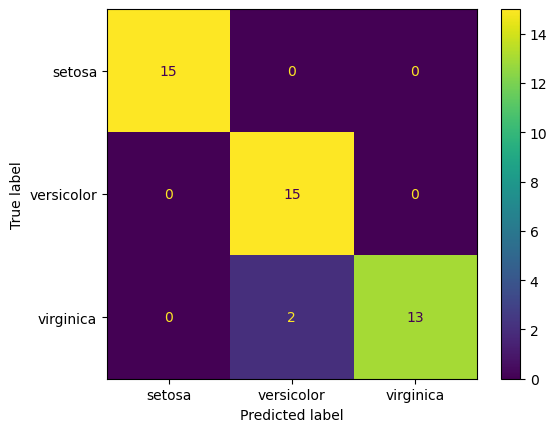

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
evaluate_classifier(y_test, y_pred, iris.target_names)
classification_metrics(y_test, y_pred, iris.target_names)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



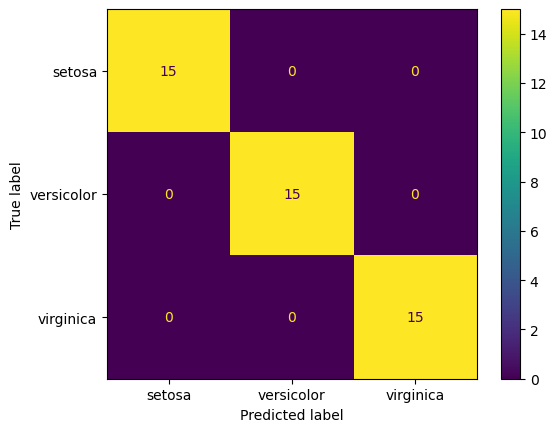

In [93]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
evaluate_classifier(y_test, y_pred, iris.target_names)
classification_metrics(y_test, y_pred, iris.target_names)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



c:\Users\quinc\miniconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


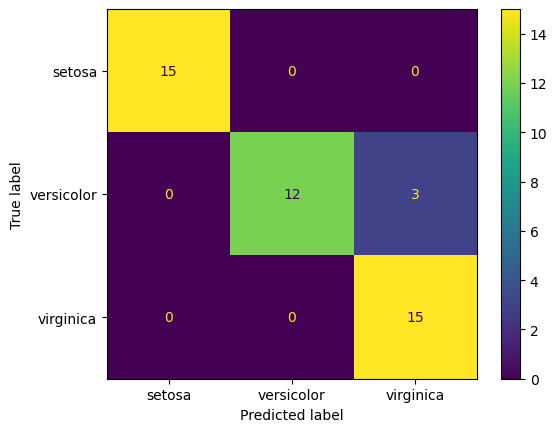

In [94]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
evaluate_classifier(y_test, y_pred, iris.target_names)
classification_metrics(y_test, y_pred, iris.target_names)


### Analysis

* Which model performed the worst? Looking at the Confusion Matrix, which two species did it struggle to distinguish?
* Perceptron performed the worst. Versicolor and Virginica had the largest distinction issue.
* 
* Why is the Perceptron limited in its ability to solve non-linearly separable problems?
* This is because it only one linear decision boundary.
* 
* The MLP is technically a "Deep Learning" model. Did it significantly outperform the SVM or KNN on this specific dataset? Why or why not?
* It did not, as it likely over complicated the comparison.


## 4. K-Fold Cross-Validation
Performance results obtained with the holdout validation method can be highly unreliable for small datasets. 
Instead, evaluate the models using Stratified 5-Fold Cross-Validation. This ensures that every data point is used for both training and testing across different iterations.

* Use `cross_val_score` to calculate the accuracy for each of the 5 folds.
* Report the mean accuracy and the standard deviation for each model.
* Generate one confusion matrix for each model using `cross_val_predict` to see the aggregate errors across all folds.

### Analysis
* Why is a 5-Fold Cross-Validation mean accuracy more "trustworthy" than a single 80/20 split accuracy for a small dataset like Iris?
* 5 fold allows for multiple splits to be tested and uses every sample for testing.
* 
* If a model has a very high mean accuracy but a very large standard deviation across folds, what does that tell you about the model's reliability?
* This means the model is very inconsistent and is fairly unreliable.
* 
* Looking at your aggregate Confusion Matrices, which species was most commonly misidentified as another? Did all models struggle with the same pair of species?
* Versicolor and Virginica were the most confused across all models.

In [86]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.svm import SVC


Perceptron
Fold accuracies: [1.         0.8        0.76666667 0.66666667 0.66666667]
Mean accuracy: 0.7800
Std deviation: 0.1222

SVM (Linear)
Fold accuracies: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean accuracy: 0.9800
Std deviation: 0.0163


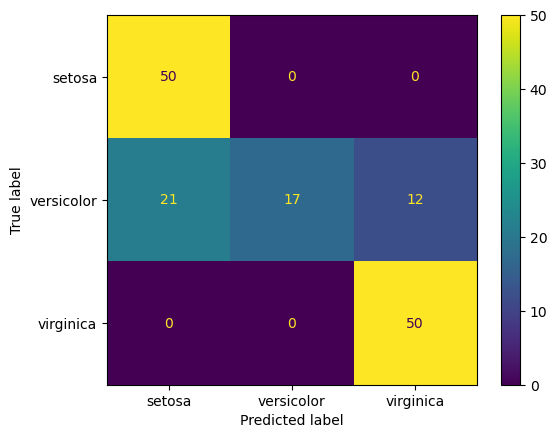

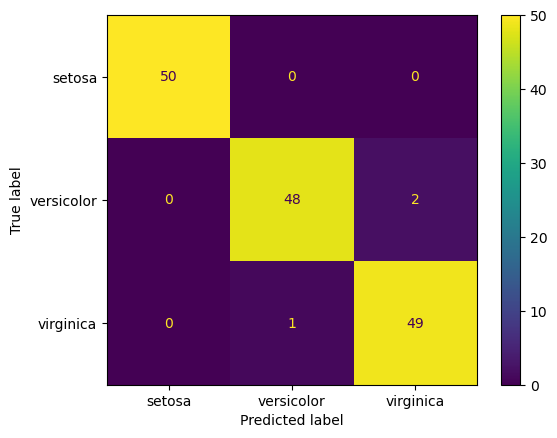

In [87]:
iris = load_iris()
X = iris.data
y = iris.target
models = {
    "Perceptron": Perceptron(random_state=42),
    "SVM (Linear)": SVC(kernel="linear", random_state=42)
}
for name, model in models.items():
    scores = cross_val_score(
        model,
        X,
        y,
        cv=5,
        scoring="accuracy"
    )
    
    print(f"\n{name}")
    print("Fold accuracies:", scores)
    print(f"Mean accuracy: {scores.mean():.4f}")
    print(f"Std deviation: {scores.std():.4f}")
for name, model in models.items():
    y_pred_cv = cross_val_predict(
        model,
        X,
        y,
        cv=5
    )

    cm = confusion_matrix(y, y_pred_cv)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=iris.target_names
    )

    disp.plot()
